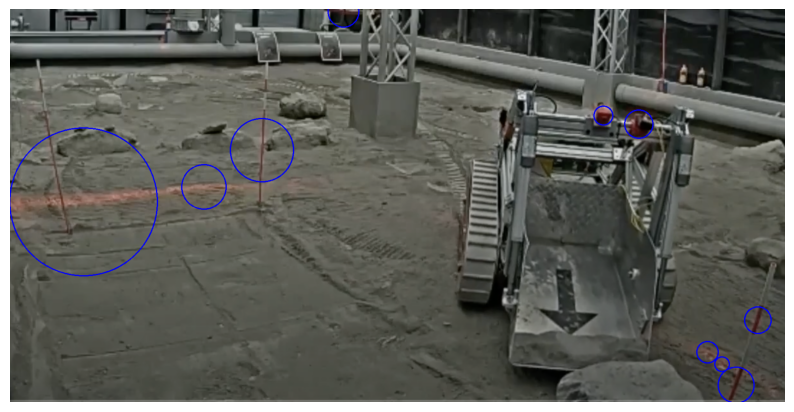

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Load image
image = cv2.imread('posts_images/posts2.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV color space

# Define the red color range in HSV with a lower threshold for saturation and value
lower_red1 = np.array([0, 70, 50])    # First red range (hue: 0-10)
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 70, 50])  # Second red range (hue: 170-180)
upper_red2 = np.array([180, 255, 255])

# Mask red areas in the image
mask1 = cv2.inRange(image_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(image_hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

# Find contours in the masked image
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw circles around detected red areas
output_image = image_rgb.copy()
for contour in contours:
    if cv2.contourArea(contour) > 200:  # Filter out very small areas to avoid noise
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)
        cv2.circle(output_image, center, radius, (0, 0, 255), 2)  # Draw a red circle around red area

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.show()